# Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data and libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [71]:
df_auto = pd.read_excel('/content/drive/MyDrive/Sentiment_Analysis_Stock_Prediction/DATA/automobile.xlsx')
df_fashion = pd.read_excel('/content/drive/MyDrive/Sentiment_Analysis_Stock_Prediction/DATA/fashion.xlsx')
df_finance = pd.read_excel('/content/drive/MyDrive/Sentiment_Analysis_Stock_Prediction/DATA/finance.xlsx')
df_tech = pd.read_excel('/content/drive/MyDrive/Sentiment_Analysis_Stock_Prediction/DATA/tech.xlsx')

In [72]:
df_auto_orig = df_auto
df_fashion_orig = df_fashion
df_finance_orig = df_finance
df_tech_orig = df_tech

# Merging the dataframes

In [73]:
frames = [df_auto, df_fashion, df_finance, df_tech]
df = pd.concat(frames)

In [74]:
df_orig = df

In [88]:
df = df_orig

# Quick cleaning

### Dropping irrelevant columns

In [89]:
df = df.drop(columns=['Unnamed: 0'])

### Dropping duplicate rows

In [90]:
print('Shape before : ', df.shape)
print('Number of duplicated rows : ', df[df.duplicated()].shape[0])
df = df.drop_duplicates()
print('Shape after : ', df.shape)

Shape before :  (129866, 6)
Number of duplicated rows :  2654
Shape after :  (127212, 6)


### Formating strings

In [91]:
def format_strings(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return text

In [92]:
df['source'] = df['source'].apply(format_strings)
df['title'] = df['title'].apply(format_strings)

### Drop sources under threshold

In [93]:
thresh_source = 30

In [94]:
df = df.groupby('source').filter(lambda x: len(x) > thresh_source).reset_index(drop=True)
print('Number of sources remaining =>',len(df['source'].unique()))
print(df.shape)

Number of sources remaining => 75
(127090, 6)


### Drop companies under threshold

In [95]:
thresh_companies = 20

In [98]:
df = df.groupby('company').filter(lambda x: len(x) > thresh_companies).reset_index(drop=True)
print('Number of companies remaining =>',len(df['company'].unique()))
print(df.shape)

Number of companies remaining => 75
(127048, 6)


# Exploring the data

### Number of articles per source

Text(0, 0.5, 'Number of articles')

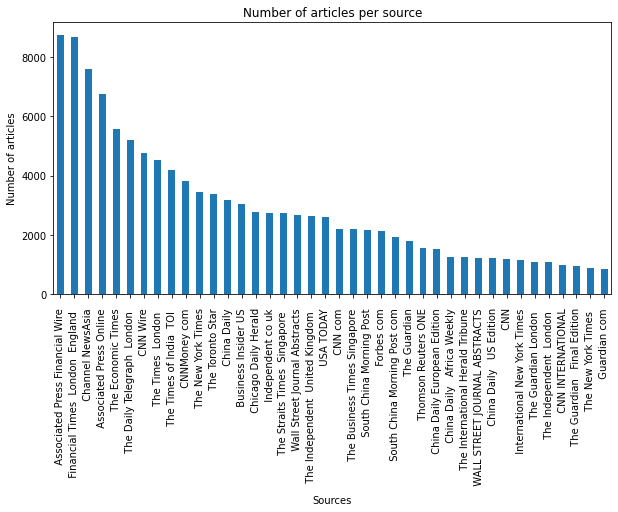

In [101]:
df.source.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of articles per source")
plt.xlabel('Sources')
plt.ylabel('Number of articles')

### Number of articles per company

Text(0, 0.5, 'Number of articles')

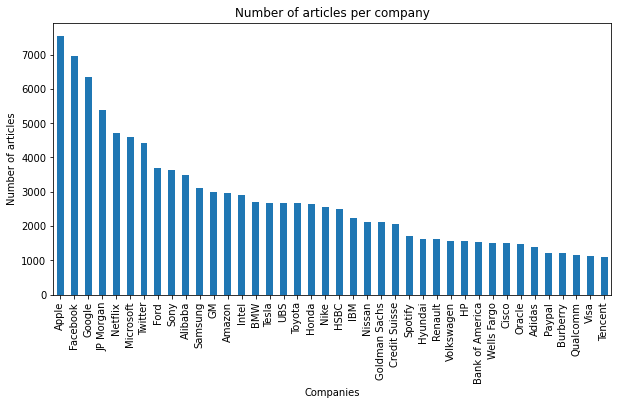

In [102]:
df.company.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of articles per company")
plt.xlabel('Companies')
plt.ylabel('Number of articles')